In [1]:
import torch

from dataclasses import dataclass, field
from matplotlib import pyplot as plt
import numpy as np
import sys

sys.path.append("../..")

# FLOPs of the mLSTM cell

In [2]:
@dataclass
class mLSTMChunkwiseConfig:
    """The input shapes of the mLSTM kernel."""

    chunk_size: int = 64
    num_chunks: int = 1
    head_dimension: int = 128
    num_heads: int = 1


@dataclass
class FLOPCounterConfig:
    """FLOP factor configuration."""

    factor_exp: int = 1
    factor_max: int = 1
    factor_mask: int = 1


@dataclass
class mLSTMChunkwiseFLOPCountConfig:
    mlstm: mLSTMChunkwiseConfig = field(default_factory=mLSTMChunkwiseConfig)
    flop_counter: FLOPCounterConfig = field(default_factory=FLOPCounterConfig)

## FLOP counting chunkwise

In [3]:
%load_ext autoreload
%autoreload 2
from mlstm_kernels.flops_utils.mlstm_flop_analysis import (
    make_chunkwise_flop_chunksize_sweep,
    make_chunkwise_flop_sequence_length_sweep,
    count_flops_mlstm_chunkwise_fw,
)
from mlstm_kernels.flops_utils.mlstm_block_flop_counts import count_flops_fw_C

In [4]:
total_flops, fw_C_flops, fw_h_flops = count_flops_mlstm_chunkwise_fw(
    L=64, Nc=3, dqk=1024, dv=1024, Nh=1, factor_exp=1, factor_mask=1, factor_max=1
)

In [5]:
total_flops / 1e6, fw_C_flops / 1e6, fw_h_flops / 1e6

(863.43909, 812.978127, 50.460963)

## FLOPs vs Chunk Size

The maximum chunk size is between 700 and 800, then we would compute more flops than necessary. 

In [6]:
count_flops_fw_C(
    L=1024, Nc=8, dqk=1024, dv=1024, Nh=1, factor_exp=1, factor_mask=1, factor_max=1
) / 1e6

34435.285032

Chunk Size: 1, Num Chunk: 8192, Total FLOPs: 51640.46M, Parallel FLOPs: 33.66M, Recurrent FLOPs: 51606.80M
Chunk Size: 2, Num Chunk: 4096, Total FLOPs: 43079.95M, Parallel FLOPs: 67.30M, Recurrent FLOPs: 43012.65M
Chunk Size: 8, Num Chunk: 1024, Total FLOPs: 36836.17M, Parallel FLOPs: 269.14M, Recurrent FLOPs: 36567.04M
Chunk Size: 16, Num Chunk: 512, Total FLOPs: 36031.03M, Parallel FLOPs: 538.26M, Recurrent FLOPs: 35492.77M
Chunk Size: 32, Num Chunk: 256, Total FLOPs: 36032.14M, Parallel FLOPs: 1076.51M, Recurrent FLOPs: 34955.63M
Chunk Size: 64, Num Chunk: 128, Total FLOPs: 36840.07M, Parallel FLOPs: 2153.00M, Recurrent FLOPs: 34687.07M
Chunk Size: 128, Num Chunk: 64, Total FLOPs: 38858.77M, Parallel FLOPs: 4305.99M, Recurrent FLOPs: 34552.78M
Chunk Size: 256, Num Chunk: 32, Total FLOPs: 43097.61M, Parallel FLOPs: 8611.97M, Recurrent FLOPs: 34485.64M
Chunk Size: 512, Num Chunk: 16, Total FLOPs: 51675.99M, Parallel FLOPs: 17223.92M, Recurrent FLOPs: 34452.07M
Chunk Size: 1024, Num Ch

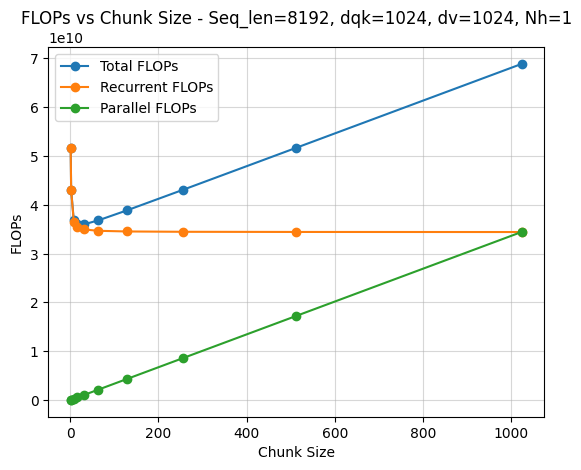

In [7]:
fig = make_chunkwise_flop_chunksize_sweep(
    seq_len=8192,
    chunk_sizes=[1, 2, 8, 16, 32, 64, 128, 256, 512, 1024],
    dqk=1024,
    dv=1024,
    Nh=1,
    factor_exp=1,
    factor_max=1,
    factor_mask=1,
)

Chunk Size: 1, Num Chunk: 2048, Total FLOPs: 12910.11M, Parallel FLOPs: 8.42M, Recurrent FLOPs: 12901.70M
Chunk Size: 2, Num Chunk: 1024, Total FLOPs: 10769.99M, Parallel FLOPs: 16.82M, Recurrent FLOPs: 10753.16M
Chunk Size: 8, Num Chunk: 256, Total FLOPs: 9209.04M, Parallel FLOPs: 67.28M, Recurrent FLOPs: 9141.76M
Chunk Size: 16, Num Chunk: 128, Total FLOPs: 9007.76M, Parallel FLOPs: 134.56M, Recurrent FLOPs: 8873.19M
Chunk Size: 32, Num Chunk: 64, Total FLOPs: 9008.04M, Parallel FLOPs: 269.13M, Recurrent FLOPs: 8738.91M
Chunk Size: 64, Num Chunk: 32, Total FLOPs: 9210.02M, Parallel FLOPs: 538.25M, Recurrent FLOPs: 8671.77M
Chunk Size: 128, Num Chunk: 16, Total FLOPs: 9714.69M, Parallel FLOPs: 1076.50M, Recurrent FLOPs: 8638.20M
Chunk Size: 256, Num Chunk: 8, Total FLOPs: 10774.40M, Parallel FLOPs: 2152.99M, Recurrent FLOPs: 8621.41M
Chunk Size: 512, Num Chunk: 4, Total FLOPs: 12919.00M, Parallel FLOPs: 4305.98M, Recurrent FLOPs: 8613.02M
Chunk Size: 1024, Num Chunk: 2, Total FLOPs: 1

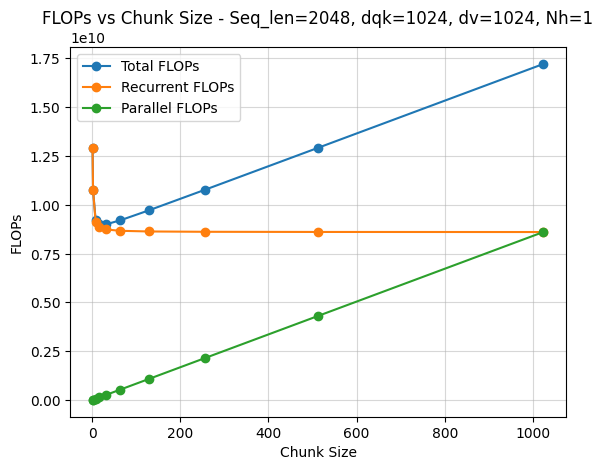

In [8]:
fig = make_chunkwise_flop_chunksize_sweep(
    seq_len=2048,
    chunk_sizes=[1, 2, 8, 16, 32, 64, 128, 256, 512, 1024],
    dqk=1024,
    dv=1024,
    Nh=1,
    factor_exp=1,
    factor_max=1,
    factor_mask=1,
)

Chunk Size: 1, Num Chunk: 8192, Total FLOPs: 12935.42M, Parallel FLOPs: 16.88M, Recurrent FLOPs: 12918.54M
Chunk Size: 2, Num Chunk: 4096, Total FLOPs: 10802.68M, Parallel FLOPs: 33.74M, Recurrent FLOPs: 10768.94M
Chunk Size: 8, Num Chunk: 1024, Total FLOPs: 9291.66M, Parallel FLOPs: 134.92M, Recurrent FLOPs: 9156.74M
Chunk Size: 16, Num Chunk: 512, Total FLOPs: 9157.86M, Parallel FLOPs: 269.82M, Recurrent FLOPs: 8888.04M
Chunk Size: 32, Num Chunk: 256, Total FLOPs: 9293.32M, Parallel FLOPs: 539.64M, Recurrent FLOPs: 8753.69M
Chunk Size: 64, Num Chunk: 128, Total FLOPs: 9765.77M, Parallel FLOPs: 1079.26M, Recurrent FLOPs: 8686.51M
Chunk Size: 128, Num Chunk: 64, Total FLOPs: 10811.43M, Parallel FLOPs: 2158.51M, Recurrent FLOPs: 8652.92M
Chunk Size: 256, Num Chunk: 32, Total FLOPs: 12953.13M, Parallel FLOPs: 4317.00M, Recurrent FLOPs: 8636.13M
Chunk Size: 512, Num Chunk: 16, Total FLOPs: 17261.72M, Parallel FLOPs: 8633.99M, Recurrent FLOPs: 8627.73M
Chunk Size: 1024, Num Chunk: 8, Total

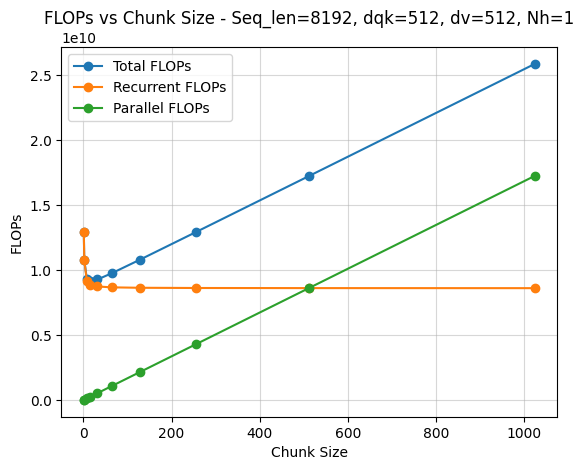

In [9]:
fig = make_chunkwise_flop_chunksize_sweep(
    seq_len=8192,
    chunk_sizes=[1, 2, 8, 16, 32, 64, 128, 256, 512, 1024],
    dqk=512,
    dv=512,
    Nh=1,
    factor_exp=1,
    factor_max=1,
    factor_mask=1,
)

Chunk Size: 1, Num Chunk: 8192, Total FLOPs: 3246.58M, Parallel FLOPs: 8.50M, Recurrent FLOPs: 3238.08M
Chunk Size: 2, Num Chunk: 4096, Total FLOPs: 2717.11M, Parallel FLOPs: 16.97M, Recurrent FLOPs: 2700.14M
Chunk Size: 8, Num Chunk: 1024, Total FLOPs: 2364.50M, Parallel FLOPs: 67.81M, Recurrent FLOPs: 2296.69M
Chunk Size: 16, Num Chunk: 512, Total FLOPs: 2365.05M, Parallel FLOPs: 135.61M, Recurrent FLOPs: 2229.45M
Chunk Size: 32, Num Chunk: 256, Total FLOPs: 2467.03M, Parallel FLOPs: 271.20M, Recurrent FLOPs: 2195.83M
Chunk Size: 64, Num Chunk: 128, Total FLOPs: 2721.40M, Parallel FLOPs: 542.39M, Recurrent FLOPs: 2179.02M
Chunk Size: 128, Num Chunk: 64, Total FLOPs: 3255.37M, Parallel FLOPs: 1084.76M, Recurrent FLOPs: 2170.61M
Chunk Size: 256, Num Chunk: 32, Total FLOPs: 4335.92M, Parallel FLOPs: 2169.52M, Recurrent FLOPs: 2166.41M
Chunk Size: 512, Num Chunk: 16, Total FLOPs: 6503.33M, Parallel FLOPs: 4339.02M, Recurrent FLOPs: 2164.31M
Chunk Size: 1024, Num Chunk: 8, Total FLOPs: 10

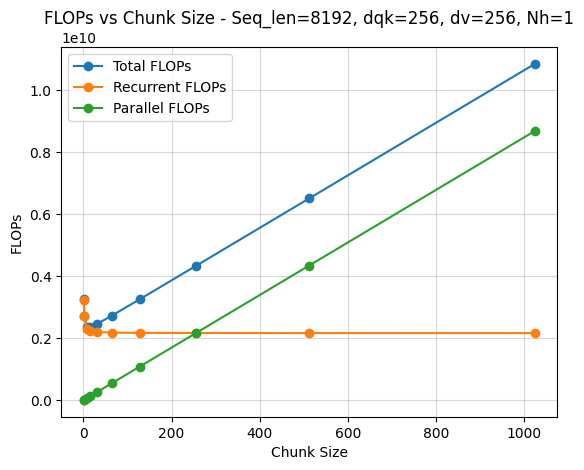

In [10]:
fig = make_chunkwise_flop_chunksize_sweep(
    seq_len=8192,
    chunk_sizes=[1, 2, 8, 16, 32, 64, 128, 256, 512, 1024],
    dqk=256,
    dv=256,
    Nh=1,
    factor_exp=1,
    factor_max=1,
    factor_mask=1,
)

## FLOPs vs Sequence length

We see the number of flops is linear in sequence length for the chunkwise, while a pure parallel (red) is quadratic.

seq_len=512, chunkwise FLOPs=2302.50M, parallel FLOPs=3229.75M
seq_len=1024, chunkwise FLOPs=4605.01M, parallel FLOPs=8610.39M
seq_len=2048, chunkwise FLOPs=9210.02M, parallel FLOPs=25830.64M
seq_len=4096, chunkwise FLOPs=18420.03M, parallel FLOPs=86106.99M
seq_len=8192, chunkwise FLOPs=36840.07M, parallel FLOPs=310003.16M


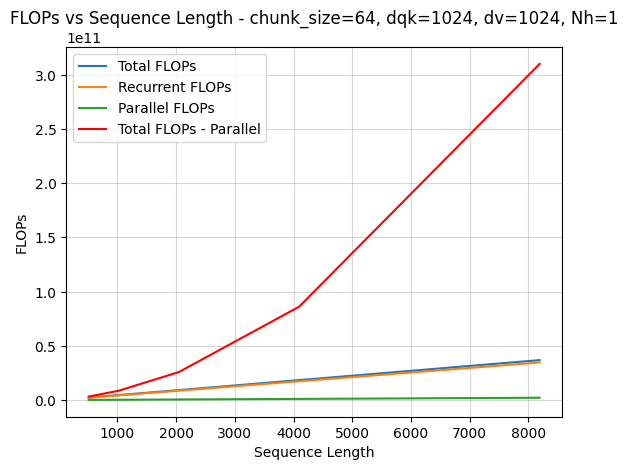

In [11]:
fig = make_chunkwise_flop_sequence_length_sweep(
    seq_lengths=[512, 1024, 2048, 4096, 8192],
    chunk_size=64,
    dqk=1024,
    dv=1024,
    Nh=1,
    factor_exp=1,
    factor_max=1,
    factor_mask=1,
)